# 1.Exploratory data analysis

In [1]:
# in order to center output (plots)
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
# some usuful libraries for file reading and data exploring
import numpy as np # for linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # for statistical data visualization

In [ ]:
# specify our working directory
# cd ./kaggle_project

# upload the files and read them as pandas DataFrames
building_data = pd.read_csv('building_metadata.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
weather_train = pd.read_csv('weather_train.csv')
weather_test = pd.read_csv('weather_test.csv')

### 1.1.Dig into the data of the building_data file

In [ ]:
# get familiar with the data 
print("The shape of building_data:", building_data.shape)
print(f'The {building_data.shape[1]} features in the data are the following:\n', building_data.columns)
print('The first fifteen rows in the building_data file:')
building_data.head(15)

The shape of building_data: (1449, 6)
The 6 features in the data are the following:
 Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')
The first fifteen rows in the building_data file:


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [ ]:
# the amount of missing data 
for x in building_data['site_id,building_id,primary_use,year_built,square_feet,floor_count'.split(",")].columns:
    miss_data = pd.isnull(building_data[x]).sum()
    print(f'{x}: \t{miss_data}')
    

site_id: 	0
building_id: 	0
primary_use: 	0
year_built: 	774
square_feet: 	0
floor_count: 	1094


Text(0.5, 1.0, 'Number of buildings / site')

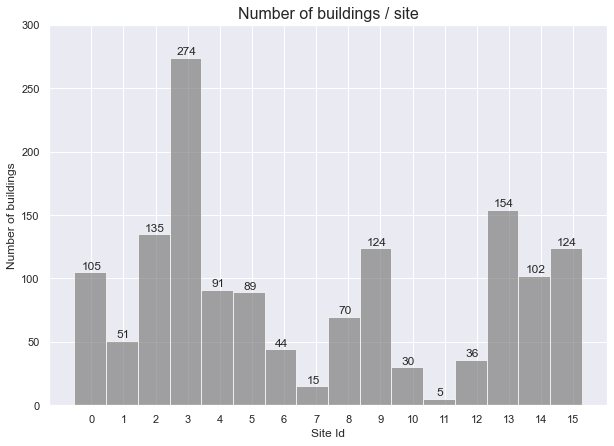

In [ ]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
n, bins, patches = ax.hist(building_data.site_id, bins=16, alpha = .7, color = 'grey')

# label each bar with the number of buildings located in that site:
for number, edge in zip(n.astype(int), bins[:-1]):
    ax.annotate(number, xy=(edge+.5, number), xytext=(0, 1),
                 textcoords="offset points", ha='center', va='bottom', fontsize=12)
# Put the site_id at the center of each bar
ax.set_xticks(np.arange(0.5, 15.2, step=.95))
ax.set_xticklabels(np.arange(0, 16))
# Set y limits
ax.set_ylim([0, 300])
# Set x and y labels and add a title
ax.set_xlabel('Site Id')
ax.set_ylabel('Number of buildings')
ax.set_title('Number of buildings / site', fontsize=16)

#plt.savefig("Building_site")

Text(0.5, 0.98, 'Distributions of building_data features')

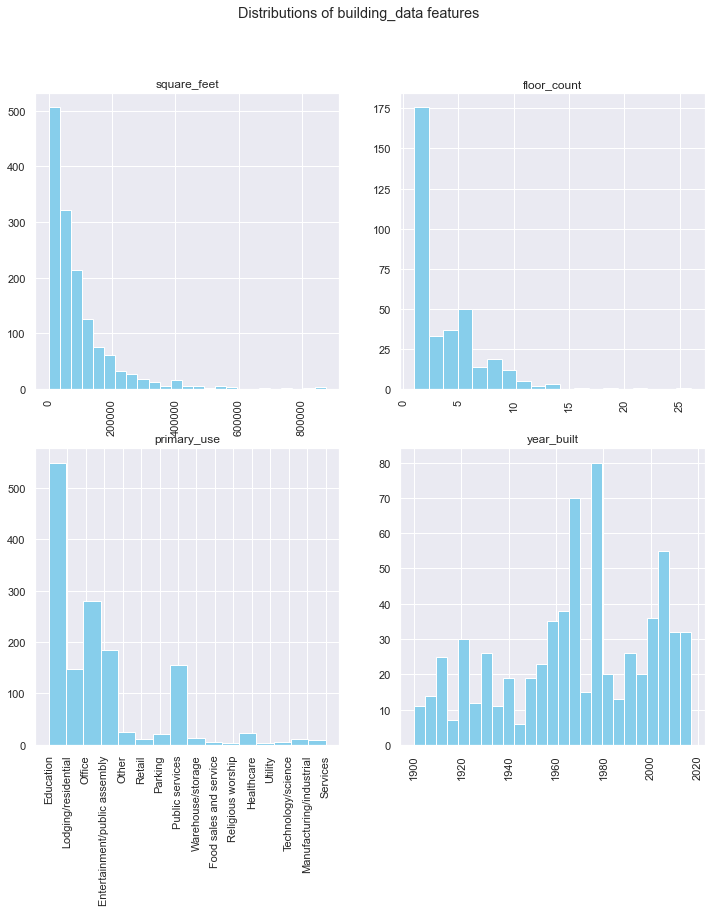

In [ ]:
# the distribution of the other 4 features in building_data dataframe
# Cut the graph zone 2 rows and 2 columns:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, col in enumerate('primary_use,year_built'.split(",")):
    building_data[col].hist(xrot=90, ax=axes[1,i], bins=min(25, len(building_data[col].unique())), color='skyblue')
    axes[1,i].set_title(col)

for i, col in enumerate('square_feet,floor_count'.split(",")):
    building_data[col].hist(xrot=90, ax=axes[0,i], bins=min(25, len(building_data[col].unique())), color='skyblue')
    axes[0,i].set_title(col)
    
fig.suptitle('Distributions of building_data features')

#plt.savefig('building_data')

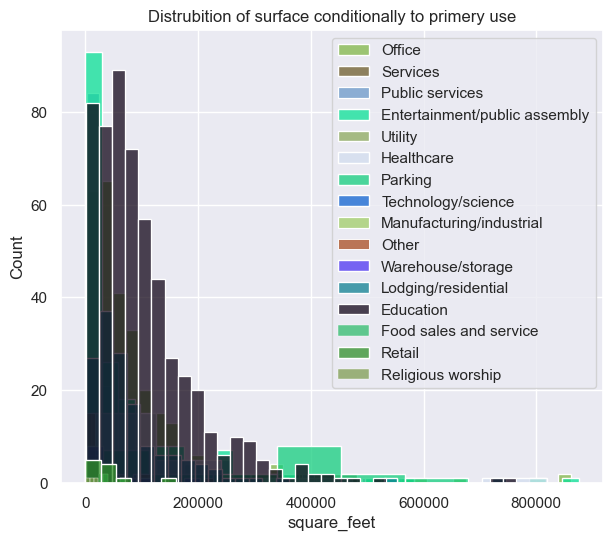

In [ ]:
# the distrubition of surface of a building conditionally to its primery use
plt.subplots(figsize=(7,6), dpi=100)
classes = list(set(building_data["primary_use"]))  # all the primary_use types 

#generate 16 colors for our 16 classes
from random import randint
color = []
for i in range(16):
    color.append('#%06X' % randint(0, 0xFFFFFF))
    
#plot the hist    
for k in range(len(classes)):
    sns.histplot( building_data.loc[building_data.primary_use == classes[k], "square_feet"],
                 label=classes[k], color = color[k])

plt.title('Distrubition of surface conditionally to primery use')
plt.legend();

#plt.savefig('primary_use')

In [ ]:
# the correlation year_built, square_feet and floor_count
building_data['year_built,square_feet,floor_count'.split(",")].corr()

,year_built,square_feet,floor_count
year_built,1.000000,0.109063,0.099393
square_feet,0.109063,1.000000,0.530298
floor_count,0.099393,0.530298,1.000000


### 1.2.Dig into the data of the train file

In [ ]:
# be familiar with the data 
print("The shape of train:", train.shape)
print(f'The {train.shape[1]} features in the data are the following:\n', train.columns)

# verify whether there is missing data 
print('Missing data in train:')
for x in train['building_id, meter, timestamp, meter_reading'.split(", ")].columns:
    miss_data = pd.isnull(train[x]).sum()
    print(f'\t{x}: \t{miss_data}')

print('The first ten rows in the train DataFrame:')
train.head(10)

The shape of train: (20216100, 4)
The 4 features in the data are the following:
 Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')
Missing data in train:
	building_id: 	0
	meter: 	0
	timestamp: 	0
	meter_reading: 	0
The first ten rows in the train DataFrame:


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


In [ ]:
# sum of all meter readings for each building
total_meter_reading = train[["building_id", "meter_reading"]].groupby("building_id").sum()

# join the new column to building_data using building_id
building_with_meter_reading = building_data.merge(total_meter_reading, how = 'inner', on='building_id')
# rename the column
building_with_meter_reading.rename(columns={'meter_reading': 'total_meter_reading'}, inplace=True)

# show the first five rows of the new dataFrame
building_with_meter_reading.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,total_meter_reading
0,0,0,Education,7432,2008.0,NaN,1.286461e+06
1,0,1,Education,2720,2004.0,NaN,6.576176e+05
2,0,2,Education,5376,1991.0,NaN,1.278194e+05
3,0,3,Education,23685,2002.0,NaN,2.069071e+06
4,0,4,Education,116607,1975.0,NaN,8.578074e+06


<AxesSubplot:title={'center':'Sum of meter readings per building in the train data'}, xlabel='The building id', ylabel='The total meter reading'>

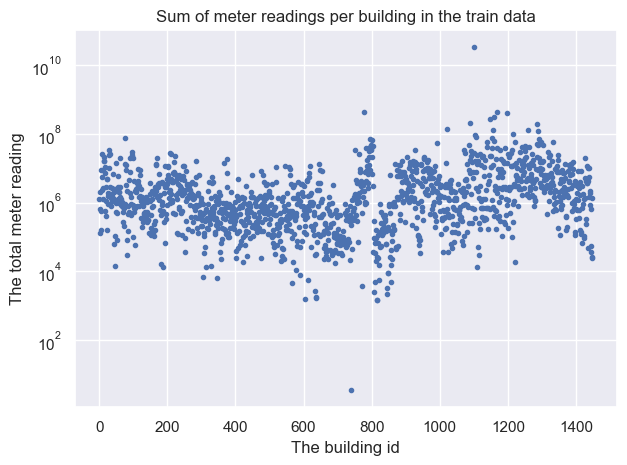

In [ ]:
# Use log scaling to plot sum of meter readings by building
plt.subplots(figsize=(7,5), dpi=100)
building_with_meter_reading['total_meter_reading'].plot(logy=True, style='.', 
                                          title='Sum of meter readings per building in the train data', 
                                          xlabel='The building id', ylabel='The total meter reading')
#plt.savefig('readings_per_building')

In [ ]:
# identify the two aberrant buildings with min and max total_meter_reading
bottom = building_with_meter_reading['total_meter_reading'].sort_values().index[0]
up = building_with_meter_reading['total_meter_reading'].sort_values().index[-1]
print("Aberrant points are:")
print(f'\tbottom: {bottom}')
print(f'\tup: \t{up}')

# get rid of those two buildings
building_without_abberant = building_with_meter_reading[(building_with_meter_reading['building_id']!=up)&
                                                        (building_with_meter_reading['building_id']!=bottom)]

Aberrant points are:
	bottom: 740
	up: 	1099


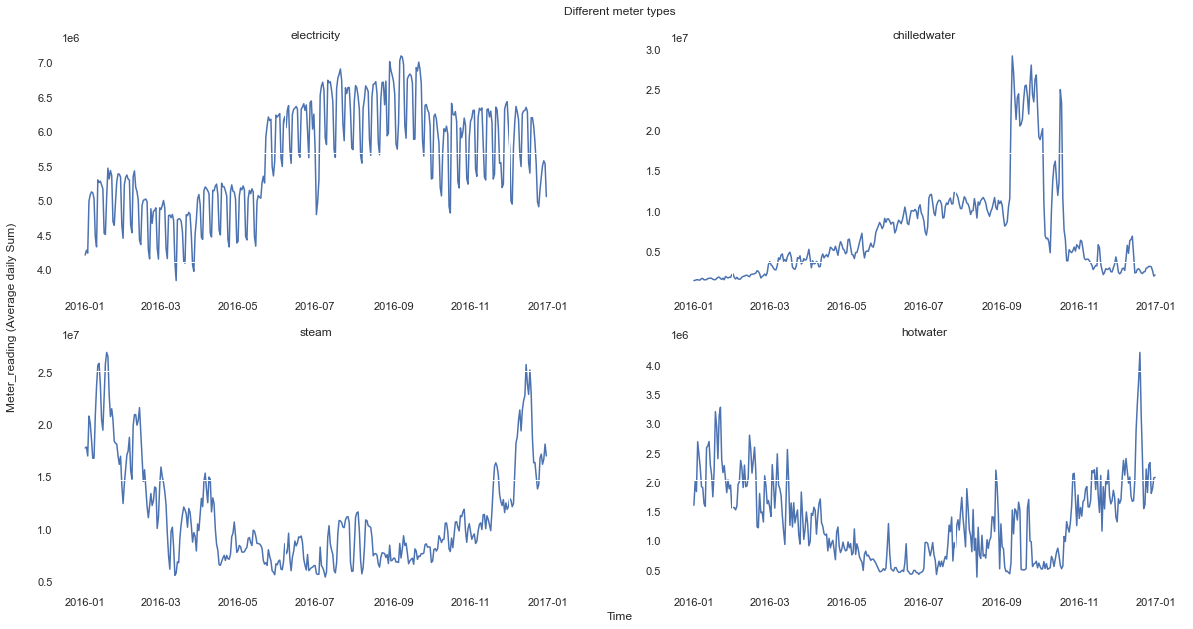

In [ ]:
# the average daily consumption in different meters
meters = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'} # according to the dataset provider

# merge train and building_without_abberant
train_merged_building = building_without_abberant.merge(train, on='building_id')

# transform timestamp to date
train_merged_building.timestamp = pd.to_datetime(train_merged_building['timestamp'])

# set up the plot window
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for ax, m in zip(axes.flat, meters): 
    meter = train_merged_building[train_merged_building['meter']==m]
    meter_daily = meter.groupby(['meter', meter['timestamp'].dt.date])['meter_reading'].sum()
    meter_daily = meter_daily.reset_index()
    mean = meter_daily.groupby('timestamp')['meter_reading'].mean()
    
    ax.plot(mean.index, mean)
    ax.set_title(meters[m])
    ax.set_facecolor("white")

# add atop level figure thet contains all the other plots.
fig.add_subplot(111, frameon=False)

# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time')
plt.ylabel('Meter_reading (Average daily Sum)', labelpad=20)

plt.title('Different meter types', pad=30)
plt.show()

#plt.savefig('different meter types')

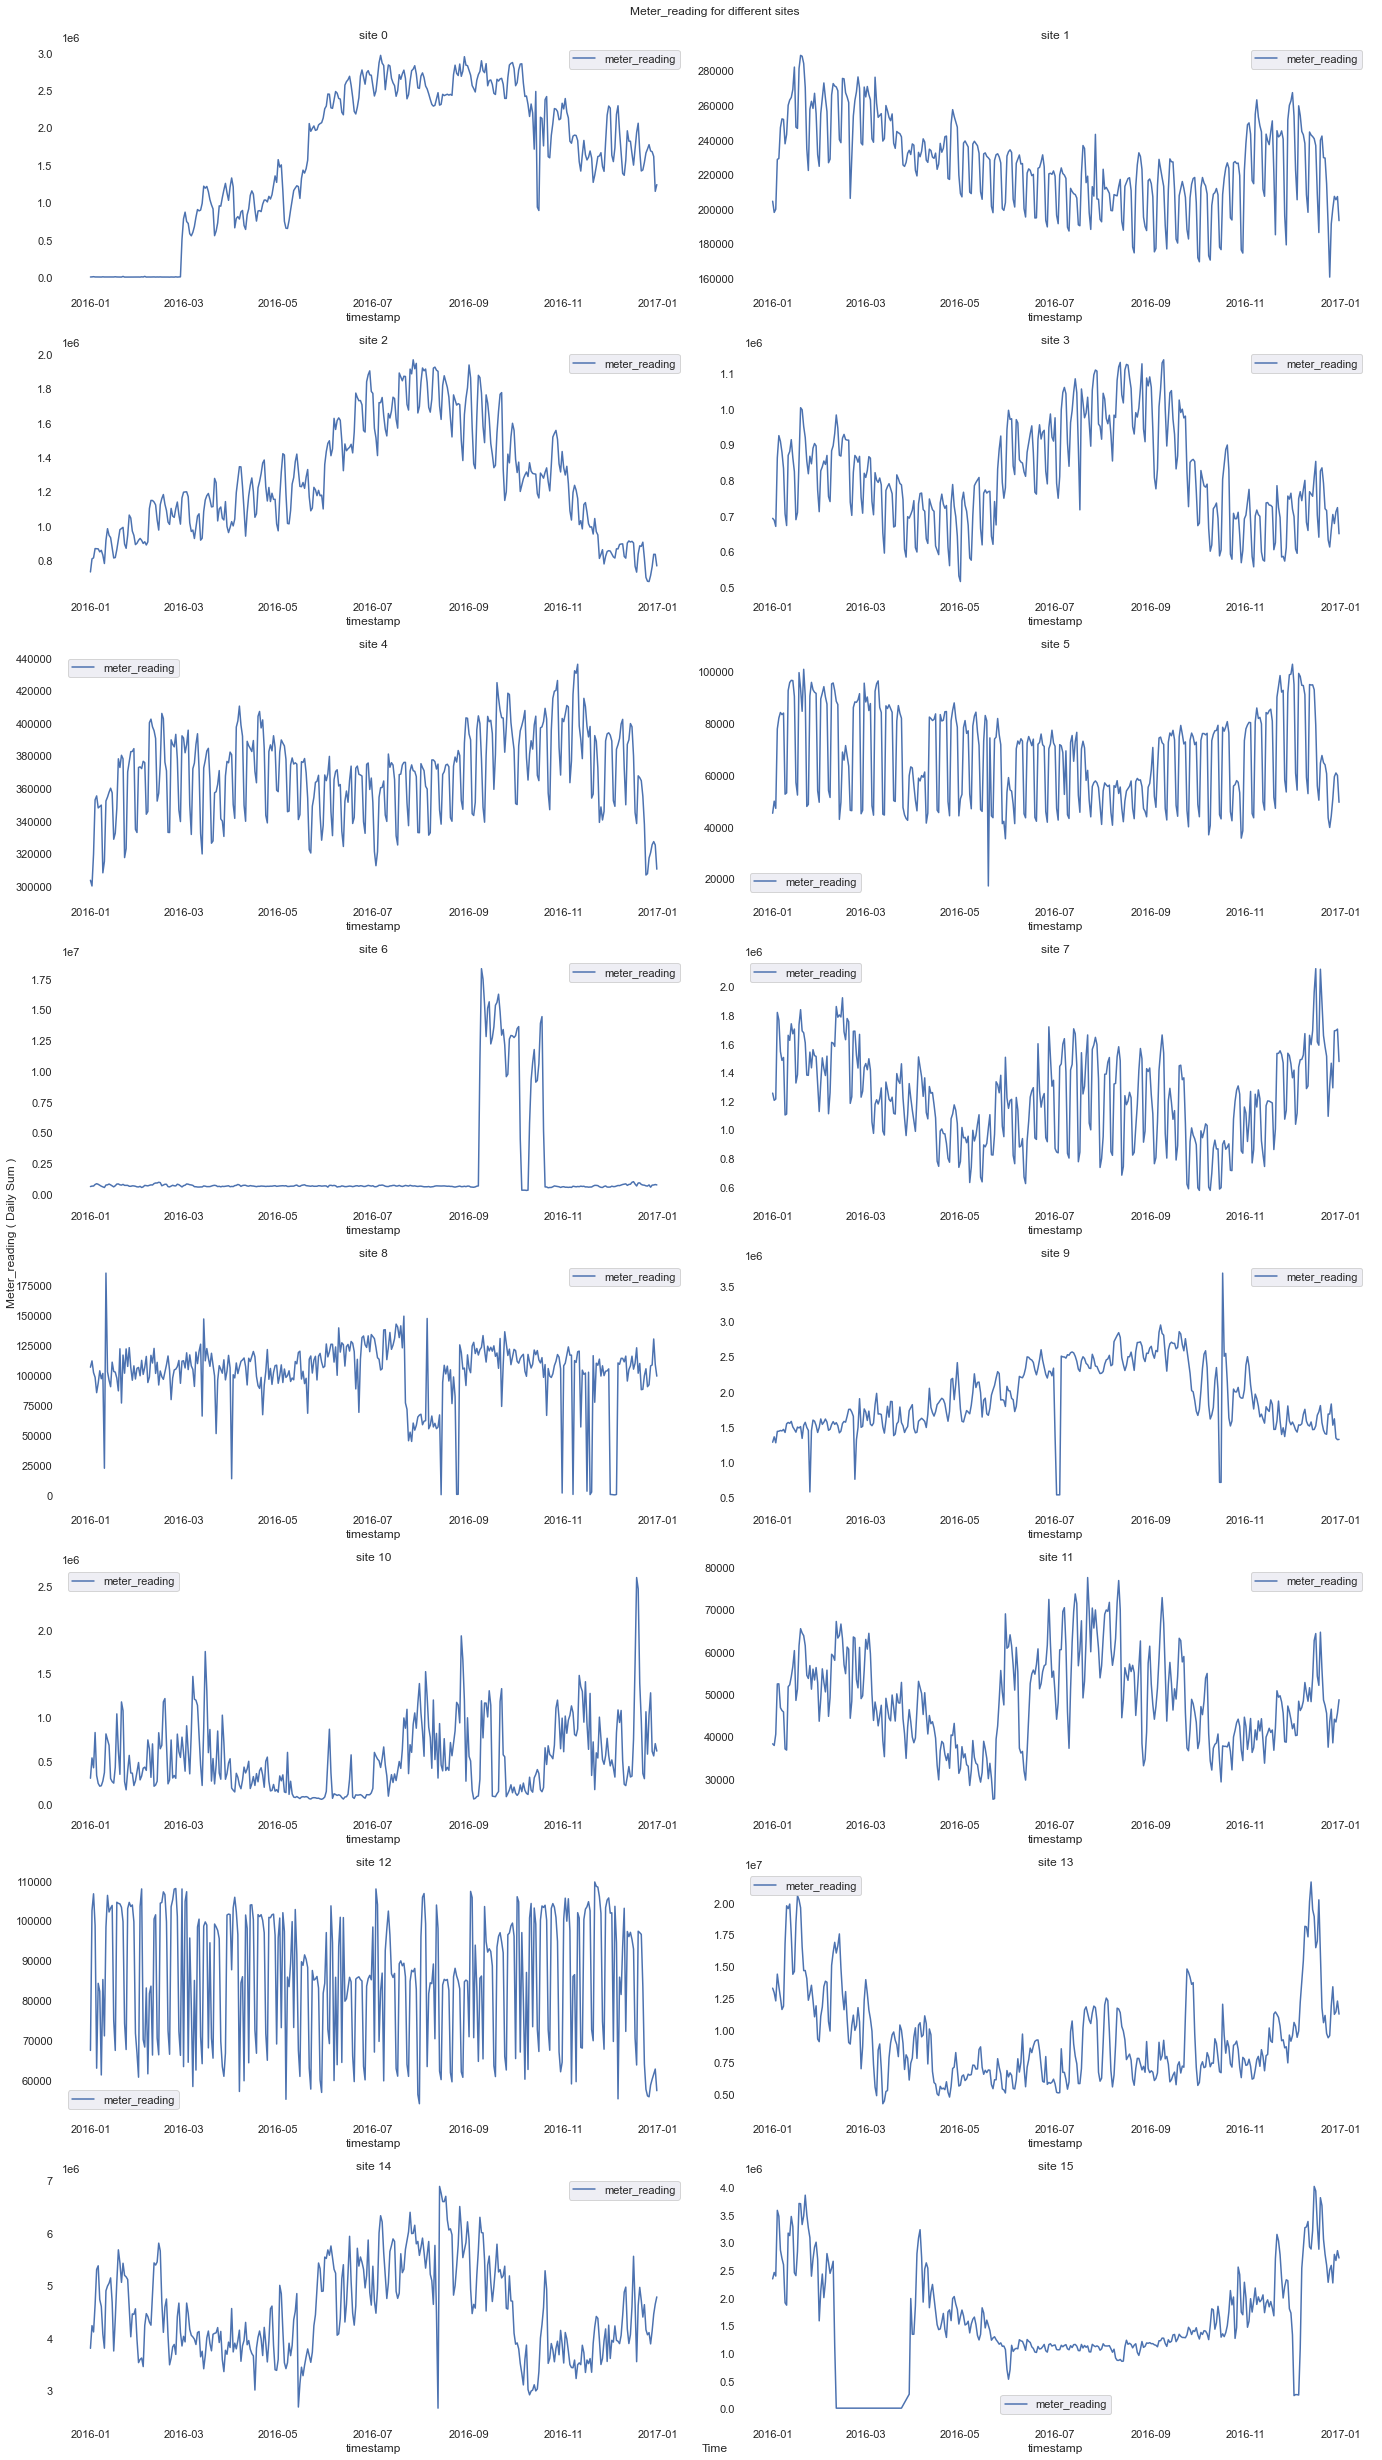

In [ ]:
# the energy consumption on each site

site_daily_sum = train_merged_building.groupby(['site_id', 
                    train_merged_building.timestamp.dt.date])['meter_reading'].sum().reset_index()
# set up window for plotting
fig, axes = plt.subplots(8, 2, figsize=(20, 35), tight_layout=True)

#plot 
for i, ax in zip(range(16), axes.flat):
    site_daily_sum[site_daily_sum.site_id == i][['timestamp', 'meter_reading']].plot(ax = ax, x = 'timestamp')
    ax.set_title(f'site {i}')
    ax.set_facecolor("white")

# add atop level figure thet contains all the other plots.
fig.add_subplot(111, frameon=False)

# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time')
plt.ylabel('Meter_reading ( Daily Sum )', labelpad=20)

plt.title('Meter_reading for different sites', pad=30)
plt.show()

#plt.savefig('readding for diff sites')

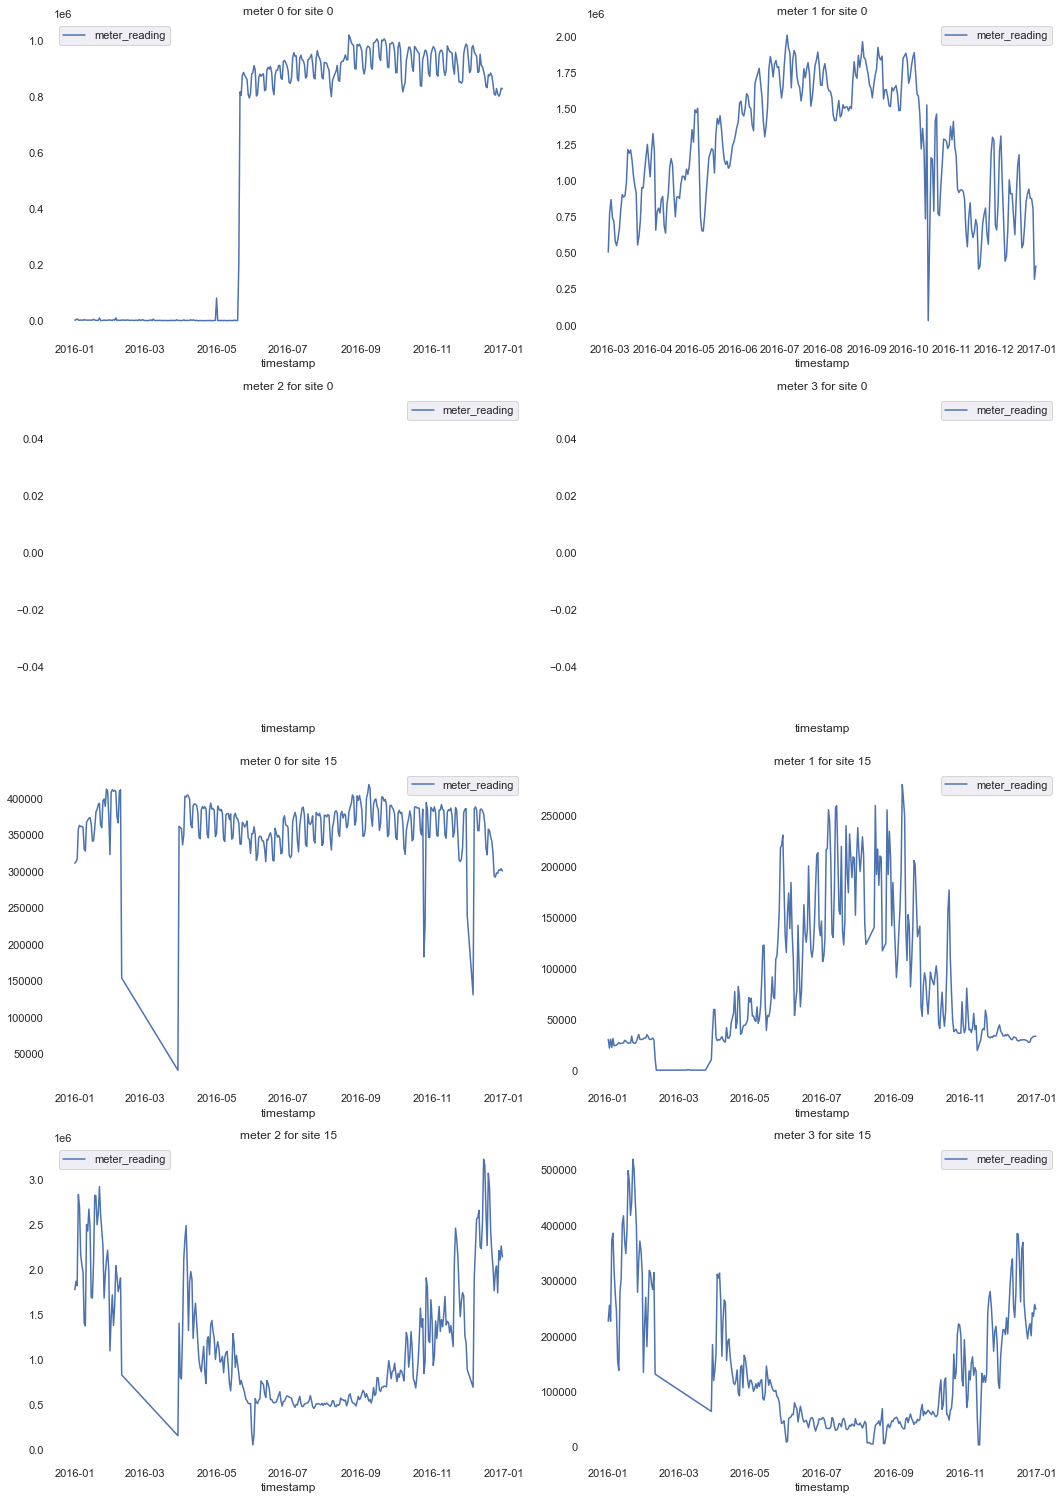

<Figure size 432x288 with 0 Axes>

In [ ]:
# identify those meter with zero recording in site 0 and site 15
meter_daily_site0 = train_merged_building[train_merged_building.site_id == 0].groupby(['meter', 
                    train_merged_building.timestamp.dt.date])['meter_reading'].sum().reset_index()

meter_daily_site15 = train_merged_building[train_merged_building.site_id == 15].groupby(['meter', 
                    train_merged_building.timestamp.dt.date])['meter_reading'].sum().reset_index()

# set up window for plotting
fig, axes = plt.subplots(4, 2, figsize=(15, 21), tight_layout=True)

#plot 
for i, ax in zip(range(4), axes.flat[0:4]):
    meter_daily_site0[meter_daily_site0.meter == i][['timestamp', 'meter_reading']].plot(ax = ax, x = 'timestamp')
    ax.set_title(f'meter {i} for site 0')
    ax.set_facecolor("white")

for i, ax in zip(range(4), axes.flat[4:8]):
    meter_daily_site15[meter_daily_site15.meter == i][['timestamp', 'meter_reading']].plot(ax = ax, x = 'timestamp')
    ax.set_title(f'meter {i} for site 15')
    ax.set_facecolor("white")

plt.show()


In [ ]:
# checking for missing data in weather_train and weather_test  
print('Missing data in weather_train:')
for x in weather_train.columns:
    miss_data = pd.isnull(weather_train[x]).sum()
    print(f'\t{x}: \t{miss_data}')

print('\nMissing data in weather_train:')
for x in weather_test.columns:
    miss_data = pd.isnull(weather_test[x]).sum()
    print(f'\t{x}: \t{miss_data}')

Missing data in weather_train:
	site_id: 	0
	timestamp: 	0
	air_temperature: 	55
	cloud_coverage: 	69173
	dew_temperature: 	113
	precip_depth_1_hr: 	50289
	sea_level_pressure: 	10618
	wind_direction: 	6268
	wind_speed: 	304

Missing data in weather_train:
	site_id: 	0
	timestamp: 	0
	air_temperature: 	104
	cloud_coverage: 	140448
	dew_temperature: 	327
	precip_depth_1_hr: 	95588
	sea_level_pressure: 	21265
	wind_direction: 	12370
	wind_speed: 	460


In [26]:
# clear everything before for a better memory performance
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [28]:
import gc
gc.collect()

88

# 2.Preparing data 

In [29]:
# some usuful libraries for file reading and data exploring
import numpy as np # for linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # for statistical data visualization

In [30]:
# upload the train files and read them as pandas DataFrames
building_data = pd.read_csv('building_metadata.csv')
train = pd.read_csv('train.csv')
weather_train = pd.read_csv('weather_train.csv')

In [55]:
# add the missing hours recordings in weather_train and weather_test
import datetime
def add_missing_hours(weather_df): # function borrowed from Kaggle
    
    time_format = "%Y-%m-%d %H:%M:%S"
    start_date = datetime.datetime.strptime(weather_df['timestamp'].min(),time_format)
    end_date = datetime.datetime.strptime(weather_df['timestamp'].max(),time_format)
    total_hours = int(((end_date - start_date).total_seconds() + 3600) / 3600)
    hours_list = [(end_date - datetime.timedelta(hours=x)).strftime(time_format) for x in range(total_hours)]

    for site_id in range(16):
        site_hours = np.array(weather_df[weather_df['site_id'] == site_id]['timestamp'])
        new_rows = pd.DataFrame(np.setdiff1d(hours_list,site_hours),columns=['timestamp'])
        new_rows['site_id'] = site_id
        weather_df = pd.concat([weather_df,new_rows]).reset_index(drop=True)
    return weather_df

#weather_train = add_missing_hours(weather_train)

In [57]:
def convert_to_datetime(df_list):
    for df in df_list:
        df['timestamp'] = pd.to_datetime(df.timestamp, errors='coerce')
    return df_list

train, weather_train = convert_to_datetime([train, weather_train])

In [58]:
# Columns to impute
weather_cols = ['air_temperature','cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 
                'sea_level_pressure', 'wind_direction', 'wind_speed']

def fill_weather_nan(df):
    # Create the month column
    df['month'] = df.timestamp.dt.month
    # Create groupby object
    gap = df.groupby(['site_id', 'month'])
    for col in weather_cols:
        df[col] = gap[col].transform(lambda x: x.fillna(x.mean()))
        df[col].fillna(np.nanmean(df[col]), inplace=True)
    # Delete the month column after use
    del df['month']
    return df

weather_train = fill_weather_nan(weather_train)

In [34]:
# replace the NaN values in weather files by monthly average

def fill_weather_nan(df):
    # Create the month column
    df['timestamp'] = df['timestamp'].apply(lambda x : pd.to_datetime(str(x)))
    df['month'] = df.timestamp.dt.month
    # Create groupby object
    gp = df.groupby(['site_id', 'month'])
    for col in weather_cols:
        df[col] = gp[col].transform(lambda x: x.fillna(x.mean()))
        df[col].fillna(np.nanmean(df[col]), inplace=True)
    # Delete the month column after use
    del df['month']
    return df

weather_train = fill_weather_nan(weather_train)

In [35]:
# join train, weather and building_data
train_full = building_data.merge(train, on='building_id').merge(weather_train, on=['site_id', 'timestamp'])
print(train_full.shape)

#delete train and weather_train to free some memory
del train, weather_train

# Remove the outliers from the training data
train_full = train_full[(train_full['building_id']!=740)&(train_full['building_id']!=1099)]

#remove the sites 0 and 15 with no meter_reading over the periods observed above
from datetime import datetime
# date references
date1 = datetime.strptime('2016-05-20', "%Y-%m-%d").date()
date2 = datetime.strptime('2016-03', "%Y-%m").date()

#get the indexes of those sites in order to drop them from the dataFrame
train_full.drop(train_full[(train_full.site_id==0) & (train_full['timestamp'].dt.date < date1) & 
                       (train_full.meter == 0)].index,inplace= True )
train_full.drop(train_full[(train_full.site_id==15) & (train_full['timestamp'].dt.date == date1) & 
                       (train_full.meter == 1)].index,inplace= True )

print(train_full.shape)

# the correlation between the target variable and the features to make a selection
train_full.corr()

(20216100, 16)
(19842105, 16)


,site_id,building_id,square_feet,year_built,floor_count,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,1.000000,0.980443,0.086948,-0.180628,-0.337324,0.240463,0.044256,-0.306475,-0.184481,-0.125826,0.080732,0.062760,0.051337,0.015839
building_id,0.980443,1.000000,0.083912,-0.212563,-0.348119,0.206974,0.040143,-0.314384,-0.212352,-0.099396,0.087459,0.086146,0.047948,0.008112
square_feet,0.086948,0.083912,1.000000,0.146464,0.584253,0.131574,0.128669,-0.014811,-0.023956,-0.022345,0.041982,-0.020062,-0.018702,-0.035811
year_built,-0.180628,-0.212563,0.146464,1.000000,0.150085,0.020372,0.131215,0.169318,0.078745,0.099611,-0.044438,-0.031900,-0.064425,-0.049080
floor_count,-0.337324,-0.348119,0.584253,0.150085,1.000000,0.176329,0.130000,-0.187589,-0.078036,-0.177989,0.211488,-0.043368,0.074131,-0.019961
meter,0.240463,0.206974,0.131574,0.020372,0.176329,1.000000,0.076419,-0.007864,-0.173516,-0.075492,0.017852,-0.048983,-0.026393,-0.080470
meter_reading,0.044256,0.040143,0.128669,0.131215,0.130000,0.076419,1.000000,-0.030655,0.005136,-0.020439,-0.000689,0.006706,0.005800,0.005563
air_temperature,-0.306475,-0.314384,-0.014811,0.169318,-0.187589,-0.007864,-0.030655,1.000000,0.056129,0.751889,-0.007353,-0.310653,-0.109254,-0.086775
cloud_coverage,-0.184481,-0.212352,-0.023956,0.078745,-0.078036,-0.173516,0.005136,0.056129,1.000000,0.085170,0.005355,-0.083543,0.032146,0.176660
dew_temperature,-0.125826,-0.099396,-0.022345,0.099611,-0.177989,-0.075492,-0.020439,0.751889,0.085170,1.000000,0.087681,-0.216696,-0.183936,-0.145121


In [36]:
# Reduce memory func borrowed from kaggle

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [37]:
# take the log of square_feet
train_full['square_feet'] = np.log(train_full['square_feet'])
train_full.rename(columns = {"square_feet":"log_sqr_feet"},inplace= True)
train_full['meter_reading'] = np.log1p(train_full['meter_reading'])
#substract month and day slot from timestamp column
train_full['month'] = train_full['timestamp'].dt.month
train_full['day_slot'] = (train_full['timestamp'].dt.hour % 24 + 4) // 4
train_full['day_slot'].replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning',
                            4: 'Noon', 5: 'Evening', 6: 'Night'}, inplace=True) 
train_full["week"] = train_full["timestamp"].dt.weekofyear
train_full["hour"] = np.uint8(train_full["timestamp"].dt.hour)

train_full =  reduce_mem_usage(train_full)
train_full.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


Memory usage after optimization is: 1154.30 MB
Decreased by 62.1%


,site_id,building_id,primary_use,log_sqr_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day_slot,week,hour
146446,0,7,Education,11.703125,1989.0,NaN,1,2016-02-29 09:00:00,7.527344,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,Morning,9,9
146449,0,9,Office,10.203125,2010.0,NaN,1,2016-02-29 09:00:00,6.382812,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,Morning,9,9
146454,0,13,Education,11.507812,2000.0,NaN,1,2016-02-29 09:00:00,7.109375,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,Morning,9,9
146456,0,14,Education,11.367188,2013.0,NaN,1,2016-02-29 09:00:00,7.269531,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,Morning,9,9
146458,0,15,Office,11.335938,1974.0,NaN,1,2016-02-29 09:00:00,6.046875,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,Morning,9,9


In [38]:
#tranform the categorical variable primary_use to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_full["primary_use"] = le.fit_transform(train_full["primary_use"])
train_full['day_slot'] = le.fit_transform(train_full['day_slot'])

# 3.Regression algorithms implementation

In [39]:
#  a function to evaluate each model based on mean absolute percentage error
from sklearn.metrics import mean_squared_error
def model_performance(model, y_pred, y_test):
    #compute the error
    errors = abs(y_pred - y_test)
    #compute mean absolute percentage error
    y = [np.max((10**-5, y_test.iloc[i])) for i in range(len(y_test))]
    mape = 100 * np.mean(errors / y)
    score = 100 - mape
    print('Model Performance')
    print('Mean absulute Error: {:0.4f}'.format(np.mean(errors)))
    print('Mean Squared Error:{:0.4f}'.format(mean_squared_error(y_pred,
                                                        y_test)))
    print('Max Absulute Deviation:{:0.4f}'.format(np.max((errors))))
    print('Score = {:0.2f}%'.format(score))                          

feat_target = ['site_id', 'building_id', 'primary_use', 'log_sqr_feet','meter',
               'month', 'week', 'day_slot', 'hour', 
               'air_temperature', 'dew_temperature']


train_full["site_id"] = train_full["site_id"].astype('category')
train_full["building_id"] = train_full["building_id"].astype('category')
train_full["meter"] = train_full["meter"].astype('category')
train_full["month"] = train_full["month"].astype('category')


# split the data into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_full[feat_target], 
  train_full['meter_reading'], test_size=0.33, random_state=0, shuffle = True)
#del train_full # no longer needed



print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(13294210, 11)
(6547895, 11)
(6547895,)


### 3.1 Linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
# create an istance of the model
reg_model = LinearRegression()
# train the model
reg_model.fit(X_train, y_train)
# predict with the model
y_pred = reg_model.predict(X_test)
# evaluate the model
model_performance(reg_model, y_pred, y_test)

Model Performance
Mean absulute Error: 1.3346
Mean Squared Error:3.3912
Max Absulute Deviation:9.2166
Score = -3252788.45%


### 3.2 Lasso model

In [18]:
from sklearn.linear_model import Lasso
# create an istance of the model
lasso = Lasso()
# train the model
lasso.fit(X= X_train, y= y_train)
# predict with the model
y_pred = lasso.predict(X_test)
# evaluate the model
model_performance(lasso, y_pred, y_test)

Model Performance
Mean absulute Error: 1.6021
Mean Squared Error:4.2005
Max Absulute Deviation:9.3546
Score = -3283871.51%


### 3.3 Random Forest Regressor model

In [21]:
from sklearn.ensemble import RandomForestRegressor as RandFR
# create an istance of the model in its base version
RandFR_model = RandFR()
# train the model on a subset of training set
p= int(1.5*10**6)
RandFR_model.fit(X= X_train.iloc[0:p,], y= y_train.iloc[0:p,])
# predict with the model
y_pred = RandFR_model.predict(X_test)
# evaluate the model
model_performance(RandFR_model, y_pred, y_test)

Model Performance
Mean absulute Error: 0.2939
Mean Squared Error:0.4530
Max Absulute Deviation:12.6222
Score = -651588.34%


In [ ]:
#Hyperparameter Tuning of the RandFR model
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in the forest
n_estimators = [50, 150, 200, 300, 400]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 21, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}



In [ ]:
# create the base model to tune
RandFR_model = RandFR()
# Walk all paramters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RandFR_search = RandomizedSearchCV(estimator = RandFR_model, 
                                   param_distributions = param_grid, 
                                   n_iter = 20, cv = 2, verbose=2,
                                   random_state=42, n_jobs = -1)
# train the search model on a subset of trainset
p= 5*10**5
RandFR_search.fit(X_train.iloc[0:p,], y_train.iloc[0:p,])

RandFR_search.best_params_

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 46.3min finished


{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}

In [23]:
# get the best version
best_RandFR = RandFR_search.best_estimator_
del RandFR_search

# train the model on a subset of training set
p= 2*10**6
best_RandFR.fit(X_train.iloc[0:p,], y_train.iloc[0:p,])
# predict with the model
y_pred = best_RandFR.predict(X_test)
# evaluate the model
model_performance(best_RandFR, y_pred, y_test)


Model Performance
Mean absulute Error: 0.2831
Mean Squared Error:0.4268
Max Absulute Deviation:12.2311
Score = -628144.38%


In [25]:
#save the model
from joblib import dump, load
dump(best_RandFR, 'RandForest.joblib') 

['RandForest.joblib']

### 3.4 Gradient Boosting Regressor model 




In [42]:
#Hyperparameter Tuning of the GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor as RGB

# set up the param grid
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

# create the base model to tune
RGB_model = RGB(n_iter_no_change = 3)
# Walk all paramters, using 2 foldS cross validation, 
# search across 20 different combinations, and use all available cores
RGB_search = RandomizedSearchCV(estimator = RGB_model, 
                                   param_distributions = param_grid, 
                                   n_iter = 20, cv = 2, verbose=2,
                                   random_state=42, n_jobs = -1)

# train the search model on a subset of trainset
p= 10**6
RGB_search.fit(X_train.iloc[0:p,], y_train.iloc[0:p,])

print("Best: with %s" % (RGB_search.best_params_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 89.3min finished


Best: with {'n_estimators': 500, 'learning_rate': 0.3}


In [43]:
# get the best version
best_RGB = RGB_search.best_estimator_
del RGB_search

# train the model on a subset of training set
p= 2*10**6
best_RGB.fit(X_train.iloc[0:p,], y_train.iloc[0:p,])
# predict with the model
y_pred = best_RGB.predict(X_test)
# evaluate the model
model_performance(best_RGB, y_pred, y_test)

Model Performance
Mean absulute Error: 0.7857
Mean Squared Error:1.4343
Max Absulute Deviation:11.7627
Score = -1979770.16%


### 3.5 Light gradient boost algorithm

In [48]:
# install the framework of lightgbm
#!pip install lightgbm
import lightgbm  as lgb  

p= 8*10**6
train_data = lgb.Dataset(X_train.iloc[0:p,], y_train.iloc[0:p,])
test_data = lgb.Dataset(X_test, y_test, reference=train_data)

categorical = ['site_id', 'building_id', 'month', 'meter']

params = {
    "objective": "regression",
    "num_leaves": 25,
    "learning_rate": 0.075,
    "feature_fraction": 0.8,
    "reg_lambda": 1.2,
    "metric": "mse"
}

model = lgb.train(params, train_data, num_boost_round= 400,
                valid_sets= test_data, early_stopping_rounds=100, 
                categorical_feature = categorical)

 
# predict with the model
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# evaluate the model
model_performance(model, y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['building_id', 'meter', 'month', 'site_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's l2: 4.17991
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.92104
[3]	valid_0's l2: 3.69897
[4]	valid_0's l2: 3.50772
[5]	valid_0's l2: 3.34559
[6]	valid_0's l2: 3.1971
[7]	valid_0's l2: 3.07566
[8]	valid_0's l2: 2.96285
[9]	valid_0's l2: 2.83552
[10]	valid_0's l2: 2.74875
[11]	valid_0's l2: 2.64577
[12]	valid_0's l2: 2.50988
[13]	valid_0's l2: 2.45472
[14]	valid_0's l2: 2.3951
[15]	valid_0's l2: 2.35382
[16]	valid_0's l2: 2.2724
[17]	valid_0's l2: 2.19614
[18]	valid_0's l2: 2.15311
[19]	valid_0's l2: 2.10504
[20]	valid_0's l2: 2.05647
[21]	valid_0's l2: 2.00123
[22]	valid_0's l2: 1.97971
[23]	valid_0's l2: 1.91596
[24]	valid_0's l2: 1.88135
[25]	valid_0's l2: 1.8592
[26]	valid_0's l2: 1.79254
[27]	valid_0's l2: 1.74147
[28]	valid_0's l2: 1.71619
[29]	valid_0's l2: 1.69314
[30]	valid_0's l2: 1.65668
[31]	valid_0's l2: 1.63067
[32]	valid_0's l2: 1.59995
[33]	valid_0's l2: 1.58141
[34]	valid_0's l2: 1.57296
[35]	valid_0's l2: 1.54245
[36]	

## 4 test file preparation for submission

In [59]:
#import test files
test = pd.read_csv('test.csv')
weather_test = pd.read_csv('weather_test.csv')

# Fill in the missing hours in weather_test to match test
weather_test = add_missing_hours(weather_test)

# Convert timestamp in both dataframes into datetime format
test, weather_test = convert_to_datetime([test, weather_test])

# Fill in missing weather records
weather_test = fill_weather_nan(weather_test)

In [61]:
# join the files
test_full = building_data.merge(test, on='building_id').merge(weather_test, on=['site_id', 'timestamp'])
# take the log of square_feet
test_full['square_feet'] = np.log(test_full['square_feet'])
test_full.rename(columns = {"square_feet":"log_sqr_feet"},inplace= True)
#substract month and day slot from timestamp column
test_full['month'] = test_full['timestamp'].dt.month
test_full['day_slot'] = (test_full['timestamp'].dt.hour % 24 + 4) // 4
test_full['day_slot'].replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning',
                            4: 'Noon', 5: 'Evening', 6: 'Night'}, inplace=True) 
test_full["week"] = test_full["timestamp"].dt.weekofyear
test_full["hour"] = np.uint8(test_full["timestamp"].dt.hour)

test_full =  reduce_mem_usage(test_full)
train_full.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


Memory usage after optimization is: 1611.35 MB
Decreased by 60.9%


,site_id,building_id,primary_use,log_sqr_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day_slot,week,hour
146446,0,7,0,11.703125,1989.0,NaN,1,2016-02-29 09:00:00,7.527344,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,3,9,9
146449,0,9,6,10.203125,2010.0,NaN,1,2016-02-29 09:00:00,6.382812,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,3,9,9
146454,0,13,0,11.507812,2000.0,NaN,1,2016-02-29 09:00:00,7.109375,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,3,9,9
146456,0,14,0,11.367188,2013.0,NaN,1,2016-02-29 09:00:00,7.269531,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,3,9,9
146458,0,15,6,11.335938,1974.0,NaN,1,2016-02-29 09:00:00,6.046875,12.796875,2.3125,8.898438,0.0,1022.0,0.0,0.0,2,3,9,9


In [62]:
# no longer needed
del test, weather_test,building_data
gc.collect()


1031

In [65]:
feat_target = ['site_id', 'building_id', 'primary_use', 'log_sqr_feet','meter',
               'month', 'week', 'day_slot', 'hour', 
               'air_temperature', 'dew_temperature']

#tranform the categorical variable primary_use to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_full["primary_use"] = le.fit_transform(test_full["primary_use"])
test_full['day_slot'] = le.fit_transform(test_full['day_slot'])

test_full["site_id"] = test_full["site_id"].astype('category')
test_full["building_id"] = test_full["building_id"].astype('category')
test_full["meter"] =  test_full["meter"].astype('category')
test_full["month"] =  test_full["month"].astype('category')

In [66]:
from joblib import load
Best_model = load('RandForest.joblib') 


In [67]:
# predict for test data
results = Best_model.predict(test_full[feat_target])

In [81]:
# import submission file
submission = pd.read_csv('sample_submission.csv', usecols=['row_id'])
# add results as a column to test after retronsformed with exp
test_full["meter_reading"] = np.exp(results)

#join the file on row_id
sample_sub = submission.merge(test_full[['row_id', 'meter_reading']], on='row_id')

sample_sub

,row_id,meter_reading
0,0,161.636476
1,1,61.509278
2,2,6.762193
3,3,167.265098
4,4,1457.928493
...,...,...
26819435,26819435,386.711671
26819436,26819436,1.024437
26819437,26819437,5252.892216
26819438,26819438,159.748523


In [82]:
# save the file
sample_sub.to_csv('submission.csv', index=False)


In [84]:
from google.colab import files
files.download( "submission.csv" )    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>